In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

ModuleNotFoundError: No module named 'tensorflow'

In [1]:
!pip install tensorflow --user

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

C:\Users\PERSONAL\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
conda install jupyter notebook

Retrieving notices: ...working... done
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 24.7.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.7.1




In [10]:
conda update -n base -c defaults conda

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\PERSONAL\anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-pack-0.7.1           |   py39haa95532_0          73 KB
    pyjwt-2.8.0                |   py39haa95532_0          75 KB
    ------------------------------------------------------------
                                           Total:         148 KB

The following packages will be UPDATED:

  conda-pack         pkgs/main/noarch::conda-pack-0.6.0-py~ --> pkgs/main/win-64::conda-pack-0.7.1-py39haa95532_0 
  pyjwt                                2.4.0-py39haa95532_0 --> 2.8.0-py39haa95532_0 




conda-pack-0.7.1     | 73 KB     |            |   0% 

pyjwt-2.8.0          | 75 KB     |            |   0% 
conda-pack-0.7.1     | 73 KB     | ##2        |  22% 

pyjwt-2.8.0          | 75 KB    



==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 24.7.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.7.1




In [3]:
df_train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/digit-recognizer/train.csv'

In [4]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
df_train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [6]:
y_train  = df_train['label'].values # np array of all the labels (42000, )
X_train = df_train.drop(columns=['label']).values.reshape(-1,28,28,1)/255.0 # drop the labels and reshape (num_rows, height , width , channel)
X_test = df_test.values.reshape(-1, 28, 28, 1) / 255.0

In [7]:
y_train_encoded = to_categorical(y_train, num_classes=10)

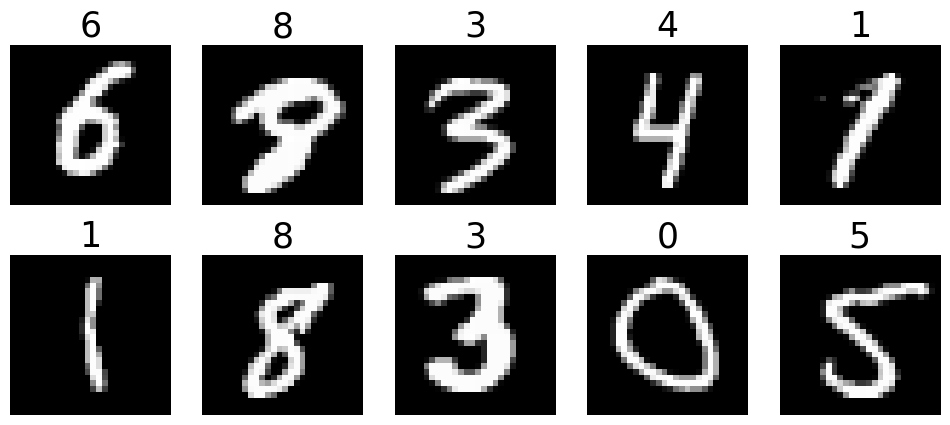

In [8]:
fig , axes  = plt.subplots(2, 5, figsize=(12,5))
axes   = axes.flatten()
idx = np.random.randint(0, 42000, size=10)
for i in range(10):
    axes[i].imshow(X_train[idx[i], :].reshape(28,28), cmap='gray')
    axes[i].axis('off') # hide the axes ticks
    axes[i].set_title(str(int(y_train[idx[i]])), color='black', fontsize=25)
plt.show()